--- Análise da Simulação ---
Tempo total de execução: 50.99 segundos
Número total de cliques: 4

Contagem de cliques por objeto:
clickedObjectId
Circle 2    1
Line 5      1
Line 1      1
Name: count, dtype: int64


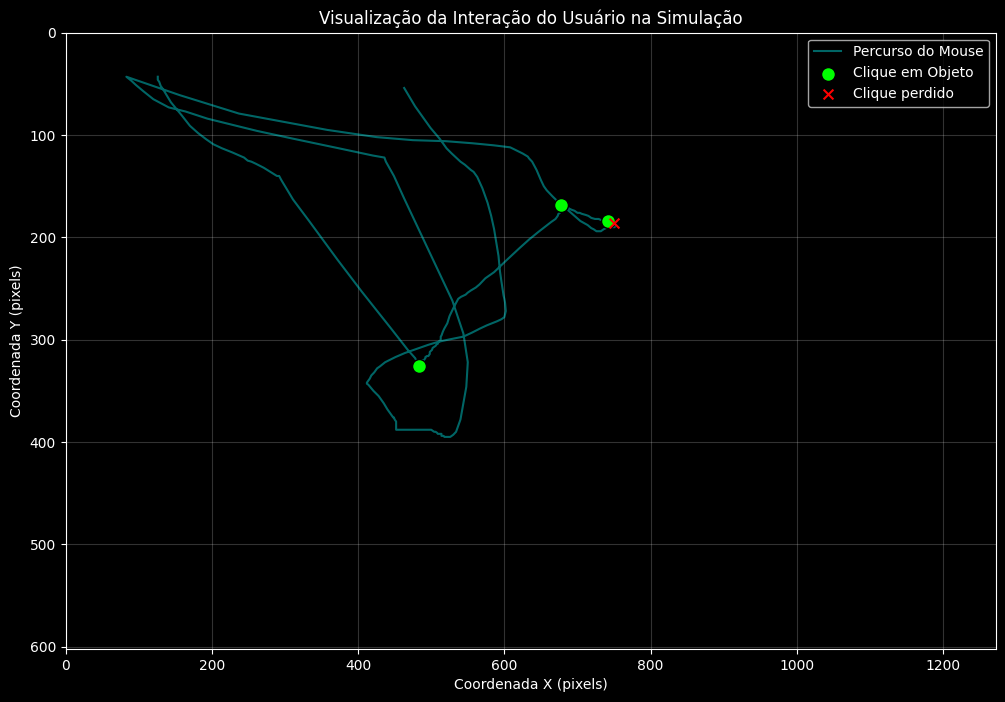

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

try:
    with open('simulation_log.json', 'r') as f:
        data = json.load(f)
except FileNotFoundError:
    print("Arquivo 'simulation_log.json' não encontrado.")
else:
    print("--- Análise da Simulação ---")

    duration_seconds = data['durationMs'] / 1000
    print(f"Tempo total de execução: {duration_seconds:.2f} segundos")

    clicks_df = pd.DataFrame(data['clicks'])
    total_clicks = len(clicks_df)
    print(f"Número total de cliques: {total_clicks}")

    clicked_objects = clicks_df.dropna(subset=['clickedObjectId'])
    if not clicked_objects.empty:
        print("\nContagem de cliques por objeto:")
        print(clicked_objects['clickedObjectId'].value_counts())
    else:
        print("\nNenhum objeto foi clicado.")

    mouse_path_df = pd.DataFrame(data['mousePath'])
    window_size = data['windowSize']

    plt.style.use('dark_background')
    fig, ax = plt.subplots(figsize=(12, 8))

    ax.plot(mouse_path_df['x'], mouse_path_df['y'], color='cyan', alpha=0.4, label='Percurso do Mouse')

    if total_clicks > 0:
      hits = clicks_df[clicks_df['clickedObjectId'].notna()]
      ax.scatter(hits['x'], hits['y'], color='lime', s=100, label='Clique em Objeto', zorder=5, edgecolors='black')

      misses = clicks_df[clicks_df['clickedObjectId'].isna()]
      ax.scatter(misses['x'], misses['y'], color='red', s=50, marker='x', label='Clique perdido', zorder=5)

    ax.set_title('Visualização da Interação do Usuário na Simulação')
    ax.set_xlabel('Coordenada X (pixels)')
    ax.set_ylabel('Coordenada Y (pixels)')
    ax.set_xlim(0, window_size['width'])
    ax.set_ylim(0, window_size['height'])
    ax.invert_yaxis()
    ax.legend()
    ax.grid(True, alpha=0.2)

    plt.show()